In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [79]:
!wget https://he-s3.s3.amazonaws.com/media/hackathon/machine-learning-Edelweiss/predict-forclosure-propensity/93fe009c-2-Foreclosure-Prediction-Dataset_.zip

--2019-02-06 17:33:48--  https://he-s3.s3.amazonaws.com/media/hackathon/machine-learning-Edelweiss/predict-forclosure-propensity/93fe009c-2-Foreclosure-Prediction-Dataset_.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 

KeyboardInterrupt: ignored

In [3]:
!unzip 93fe009c-2-Foreclosure-Prediction-Dataset_.zip

Archive:  93fe009c-2-Foreclosure-Prediction-Dataset_.zip
  inflating: Customers_31JAN2019.xlsx  
  inflating: LMS_31JAN2019.xlsx      
  inflating: RF_Final_Data.xlsx      
  inflating: test_foreclosure.csv    
  inflating: train_foreclosure.csv   


In [0]:
train = pd.read_csv('train_foreclosure.csv')
test = pd.read_csv('test_foreclosure.csv')

In [3]:
train.head(10)

,AGREEMENTID,FORECLOSURE
0,11220001,1
1,11220002,1
2,11220006,1
3,11220008,1
4,11220010,1
5,11220011,0
6,11220012,0
7,11220014,1
8,11220016,1
9,11220017,0


In [4]:
test.head(10)

,AGREEMENTID,FORECLOSURE
0,11220003,NaN
1,11220004,NaN
2,11220005,NaN
3,11220007,NaN
4,11220009,NaN
5,11220013,NaN
6,11220015,NaN
7,11220018,NaN
8,11220019,NaN
9,11220023,NaN


In [0]:
test.drop('FORECLOSURE', axis=1, inplace=True)

In [6]:
test.head(10)

,AGREEMENTID
0,11220003
1,11220004
2,11220005
3,11220007
4,11220009
5,11220013
6,11220015
7,11220018
8,11220019
9,11220023


In [7]:
train.dtypes, test.dtypes

(AGREEMENTID    int64
 FORECLOSURE    int64
 dtype: object, AGREEMENTID    int64
 dtype: object)

In [8]:
train.isnull().sum(),test.isnull().sum()

(AGREEMENTID    0
 FORECLOSURE    0
 dtype: int64, AGREEMENTID    0
 dtype: int64)

In [9]:
train.describe()

,AGREEMENTID,FORECLOSURE
count,2.001200e+04,20012.000000
mean,1.123665e+07,0.089696
std,9.626440e+03,0.285753
min,1.122000e+07,0.000000
25%,1.122833e+07,0.000000
50%,1.123661e+07,0.000000
75%,1.124496e+07,0.000000
max,1.125335e+07,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1aead15518>,
      dtype=object)

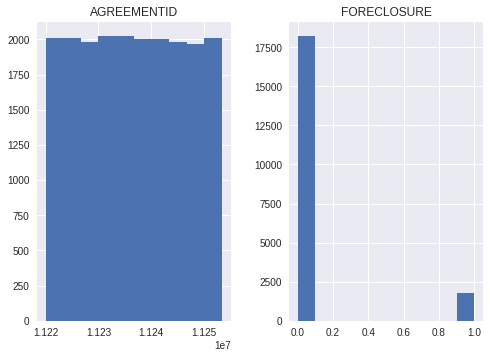

In [10]:
train.hist()

In [11]:
train_data = train.drop('FORECLOSURE', axis=1)
target = train['FORECLOSURE']

train_data.shape, target.shape

((20012, 1), (20012,))

In [12]:
X_train = train_data
Y_train =target
X_test = test.copy()
X_train.shape, Y_train.shape, X_test.shape

((20012, 1), (20012,), (13342, 1))

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [14]:
#Linear Regression

linreg = LinearRegression()
linreg.fit(X_train, Y_train)
Y_pred = linreg.predict(X_test)
acc_log = round(linreg.score(X_train, Y_train) * 100, 2)
acc_log

13.25

In [15]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(linreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
0,FORECLOSURE,-0.000011


In [16]:
#K-nearest (k-NN)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

93.49

In [17]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

91.03

In [18]:
#Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


91.03

In [19]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


91.03

In [20]:

# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [21]:

# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

99.99

In [0]:
Y_pred = Y_pred.tolist()
for i in range(len(Y_pred)):
    if Y_pred[i] == 1:
        Y_pred[i] = 1
    else:
        Y_pred[i] = 0
y_pred = np.array(Y_pred)

In [0]:
submission = pd.DataFrame({
        "AGREEMENTID": test["AGREEMENTID"],
        "FORECLOSURE": Y_pred
    })
submission.to_csv('./submission.csv', index=False)

In [24]:
submission['FORECLOSURE'].value_counts()

0    12145
1     1197
Name: FORECLOSURE, dtype: int64

In [26]:
train['FORECLOSURE'].value_counts()

0    18217
1     1795
Name: FORECLOSURE, dtype: int64

In [25]:
submission.head(10)

,AGREEMENTID,FORECLOSURE
0,11220003,1
1,11220004,1
2,11220005,1
3,11220007,1
4,11220009,1
5,11220013,0
6,11220015,1
7,11220018,0
8,11220019,1
9,11220023,1


In [27]:

submission = pd.read_csv('submission.csv')
submission.head()

,AGREEMENTID,FORECLOSURE
0,11220003,1
1,11220004,1
2,11220005,1
3,11220007,1
4,11220009,1


In [0]:
from google.colab import files
files.download('submission.csv')